In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import soundfile as sf
import sklearn

In [3]:
# load data

y_m, sr_m = librosa.load(
    'c:/nmb/nmb_data/주형.wav'
) # 남성 음성

y_f, sr_f = librosa.load(
    'c:/nmb/nmb_data/영리.wav'
) # 여성 음성

In [4]:
# mfcc

def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)

mfcc_m = librosa.feature.mfcc(
    y_m, sr = sr_m
) # mfcc 변환
mfcc_m_norm = normalize(mfcc_m, axis = 1)

mfcc_f = librosa.feature.mfcc(
    y_f, sr = sr_f
)
mfcc_f_norm = normalize(mfcc_f, axis = 1)

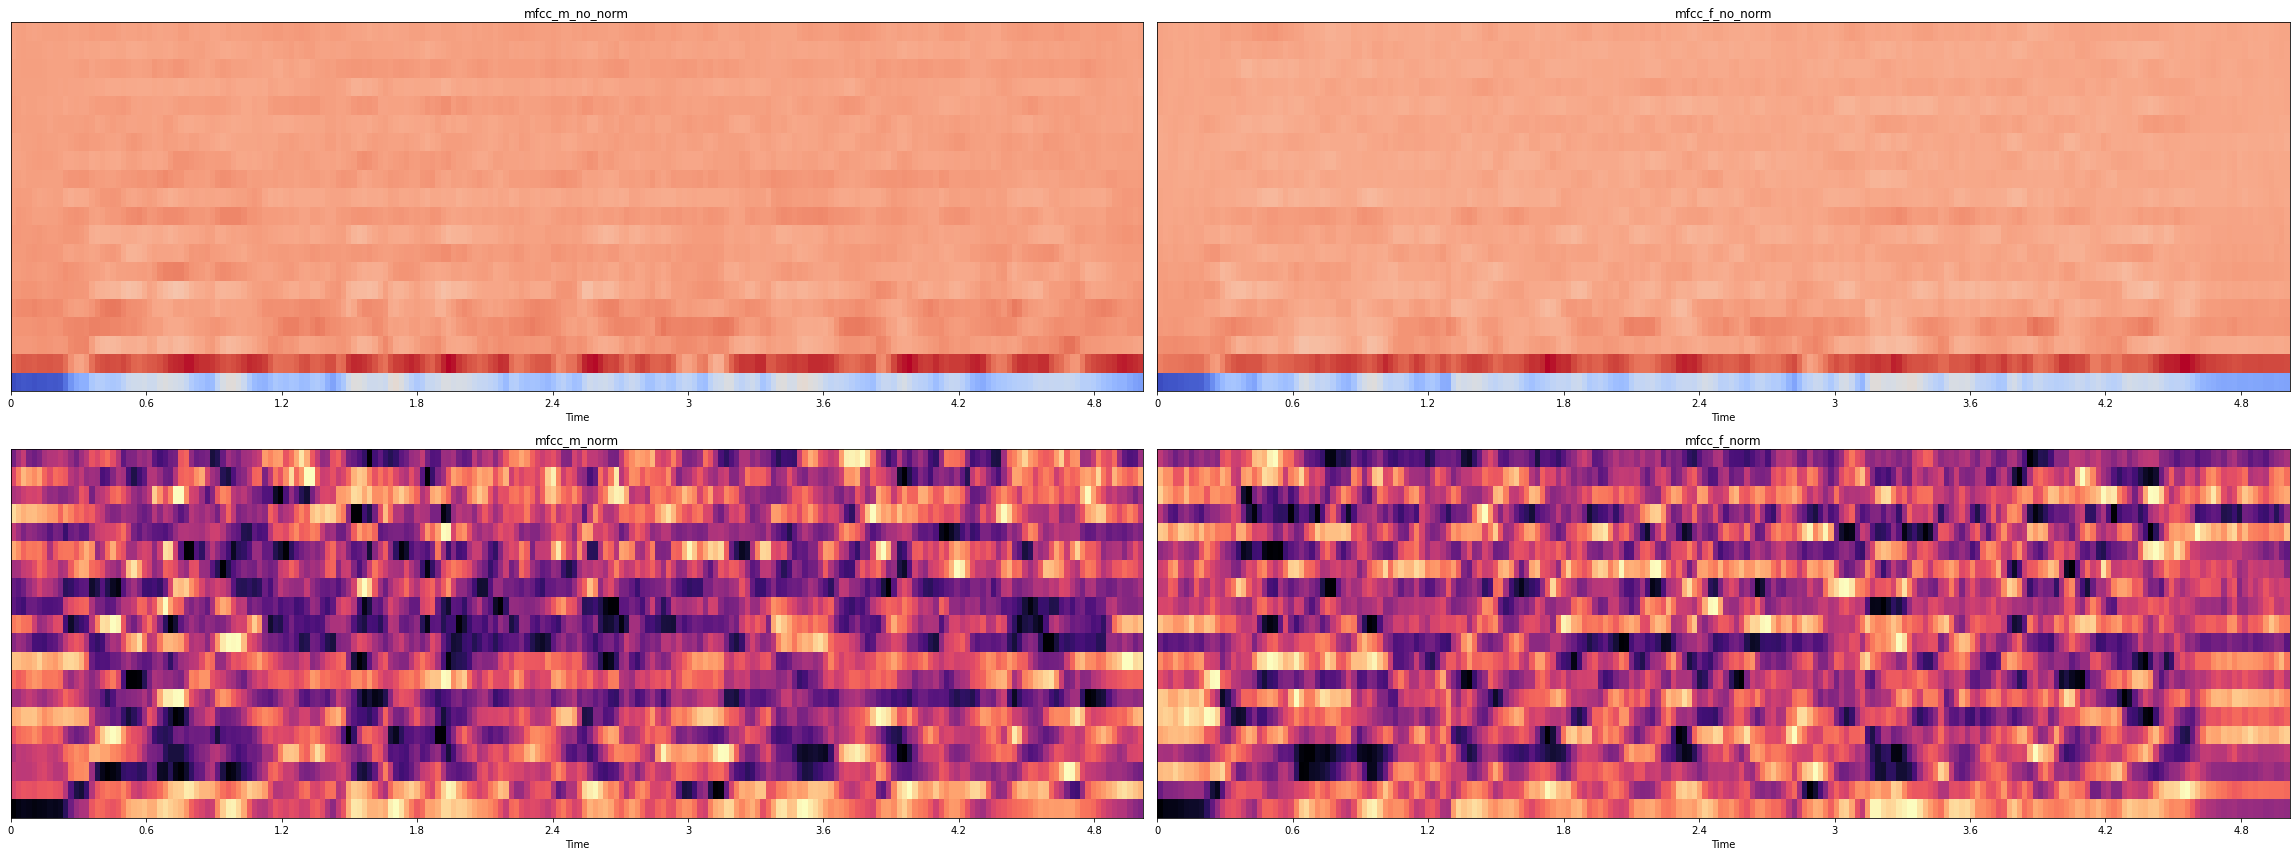

In [5]:
# visualization

fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

librosa.display.specshow(
    mfcc_m, sr = sr_m, x_axis = 'time', ax = ax1
)
ax1.set(title = 'mfcc_m_no_norm')

librosa.display.specshow(
    mfcc_f, sr = sr_f, x_axis = 'time', ax = ax2
)
ax2.set(title = 'mfcc_f_no_norm')

librosa.display.specshow(
    mfcc_m_norm, sr = sr_m, x_axis = 'time', ax = ax3
)
ax3.set(title = 'mfcc_m_norm')

librosa.display.specshow(
    mfcc_f_norm, sr = sr_f, x_axis = 'time', ax = ax4
)
ax4.set(title = 'mfcc_f_norm')

fig.tight_layout()
plt.show()

In [7]:
# mfcc_to_mel

mtm_m = librosa.feature.inverse.mfcc_to_mel(
    mfcc_m_norm,
    n_mels = 128, 
    dct_type = 2, 
    norm = 'ortho', # 'backward', 'ortho', 'forward' 존재
    ref = 1.0, 
    lifter = 0
)

mtm_f = librosa.feature.inverse.mfcc_to_mel(
    mfcc_f_norm,
    n_mels = 128,
    dct_type = 2,
    norm = 'ortho',
    ref = 1.0,
    lifter = 0
)

C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\envs\tf_cert\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


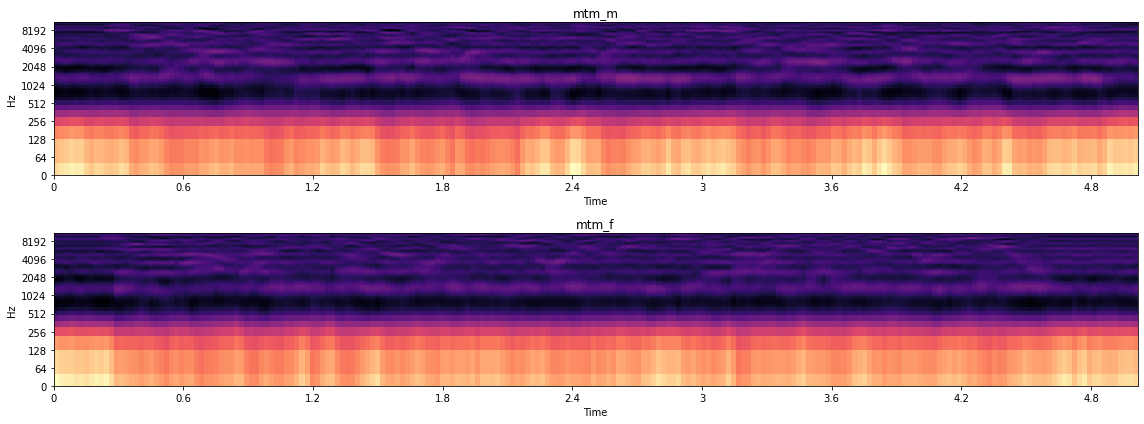

In [8]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

librosa.display.specshow(
    mtm_m, sr = sr_m, x_axis = 'time', y_axis = 'log', ax = ax1
)
ax1.set(title = 'mtm_m')

librosa.display.specshow(
    mtm_f, sr = sr_f, x_axis = 'time', y_axis = 'log', ax = ax2
)
ax2.set(title = 'mtm_f')

fig.tight_layout()
plt.show()

In [11]:
# melspectrogram 과 mfcc_to_mel 과의 비교

S_m = librosa.feature.melspectrogram(
    y_m, sr = sr_m, n_fft = 512, hop_length = 128
)
S_m = librosa.amplitude_to_db(
    S_m, ref = np.max
)

S_f = librosa.feature.melspectrogram(
    y_f, sr = sr_f, n_fft = 512, hop_length = 128
)
S_f = librosa.amplitude_to_db(
    S_f, ref = np.max
)

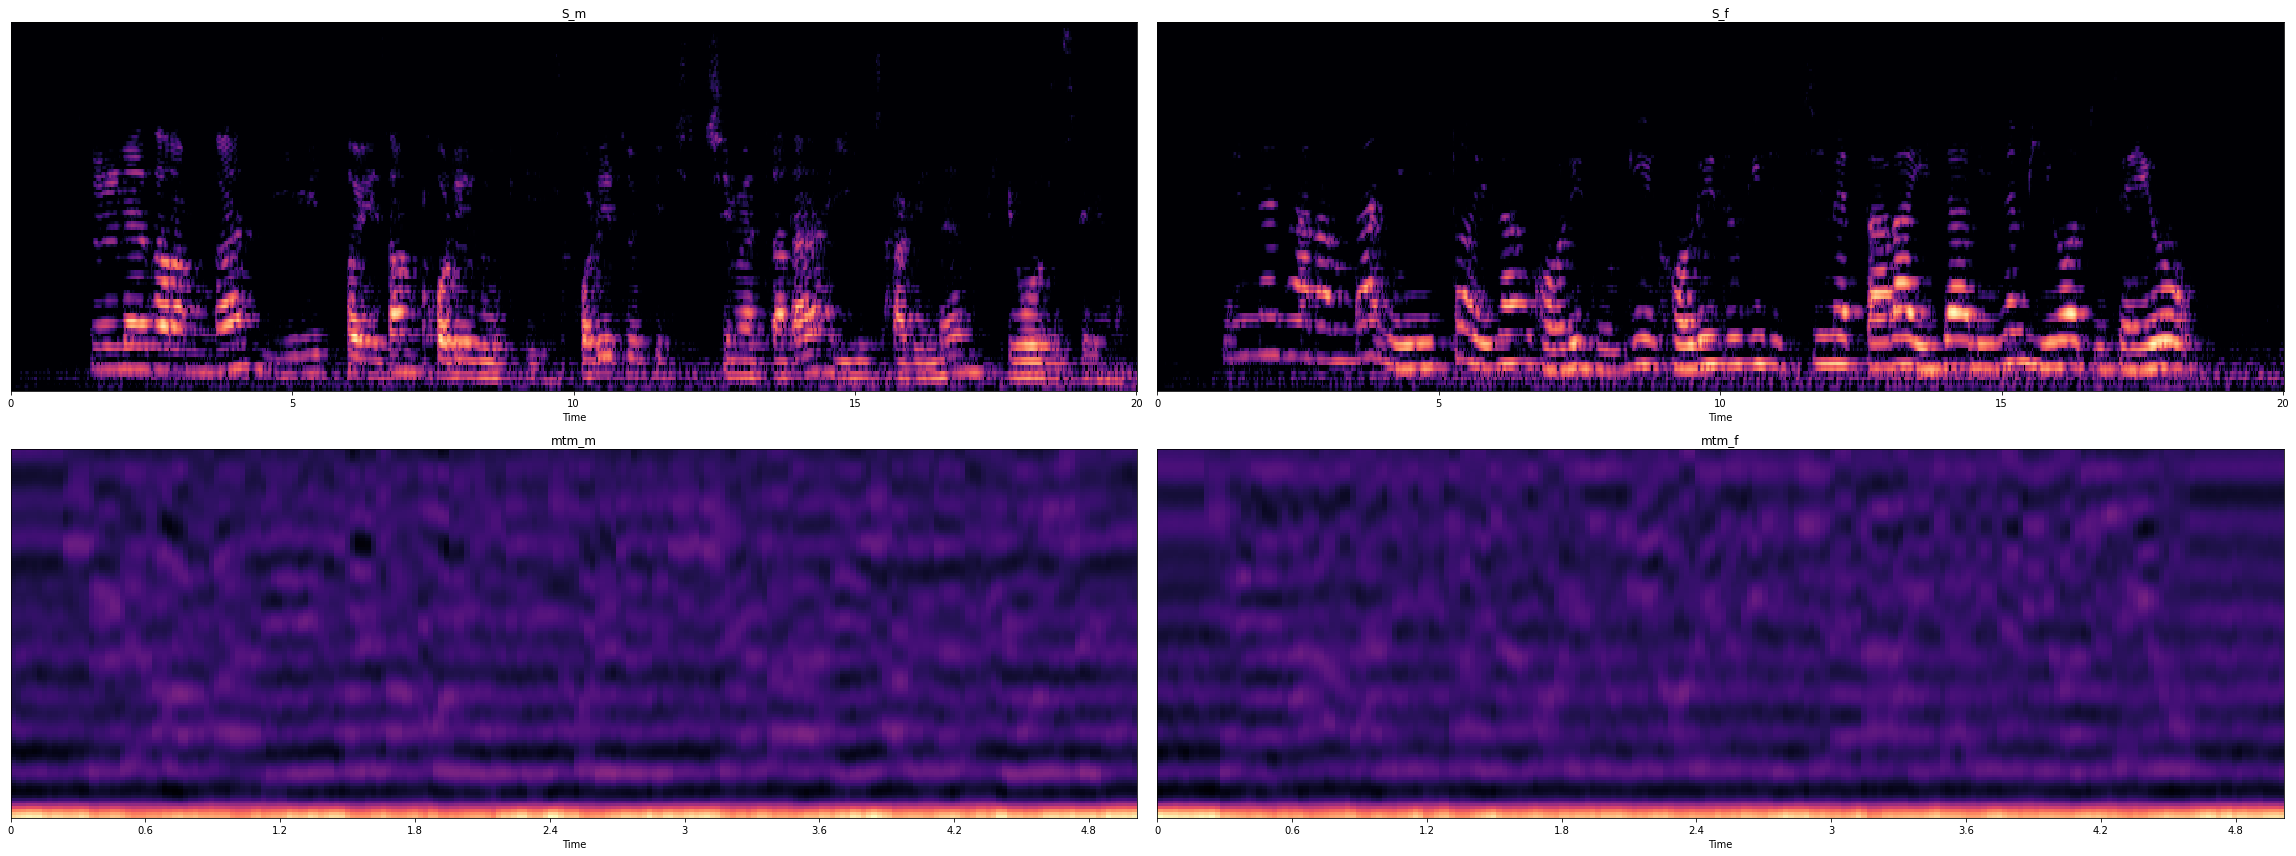

In [13]:
# visualization

fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

librosa.display.specshow(
    S_m, sr = sr_m, x_axis = 'time', ax = ax1
)
ax1.set(title = 'S_m')

librosa.display.specshow(
    S_f, sr = sr_f, x_axis = 'time', ax = ax2
)
ax2.set(title = 'S_f')

librosa.display.specshow(
    mtm_m, sr = sr_m, x_axis = 'time', ax = ax3
)
ax3.set(title = 'mtm_m')

librosa.display.specshow(
    mtm_f, sr = sr_f, x_axis = 'time', ax = ax4
)
ax4.set(title = 'mtm_f')

fig.tight_layout()
plt.show()

In [16]:
# sf.write(
#     'c:/nmb/nmb_data/S_m.wav', S_m, sr_m
# )